In [73]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
#import opendatasets as od
#od.download("https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sundarcy
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 8.56k/8.56k [00:00<00:00, 2.19MB/s]

**Чтение данных**

In [2]:

data = pd.read_csv("C://Users//stale//Documents//heart.csv")

In [3]:
#первые 5 строк нашего датасета
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#Содержимое датасета
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

В своей работе рассматривается набор данных для прогнозирования сердечной недостаточности. Простыми словами сердечная недостаточность — это  синдром, при котором нарушена способность сердца перекачивать кровь.
Набор данных состоит из 918 строк (пациенты) и 12 столбцов (признаки, на основании которых делаем вывод есть сердечная недостаточность или она отсуствует).

Перечислим их:

Age - возраст пациента [years]

Sex - пол пациента [M: Male, F: Female]

ChestPainType - тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]

RestingBP - кровяное давление в состоянии покоя [mm Hg]

Cholesterol - сывороточный холестерин [mm/dl]

Fasting BS - уровень сахара в крови натощак [1: если уровень сахара в крови натощак > 120 mg/dl, 0: в противном случае]

RestingECG - результаты электрокардиограммы в покое [Normal: нормальный, ST: аномалия зубца ST-T, LVH: веероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

Max HR - достигнутая максимальная частота сердечных сокращений [числовое значение от 60 до 202]

Exercise Angina - стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

Old peak - пик нагрузки [ST]

ST_Slope - наклон сегмента ST пикового упражнения  [Up: восходящий уклон, Flat: плоский, Down: нисходящий уклон]

Heart Disease - есть ли сердечная недостаточность   [1: болезнь сердца, 0: норма]










In [5]:
#Всего 918 строк и 12 стобцов
print(data.shape)
#Отобразим список всех столбцов нашего набора данных
print(data.columns)

(918, 12)
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Посмотрим информацию по нашим столбцам.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Посмотрим количество уникальных элементов.


In [7]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

**Визуализация данных и вычисление основных характеристик**

In [8]:
#Для удобства анализа осуществим отбор числовых колонок
#data_numerical = data.select_dtypes(include = [np.number])
num_cols = [cname for cname in data.columns if data[cname].dtype =='int' or data[cname].dtype =='float' ]
print(num_cols)

['Oldpeak']


In [9]:
#Также отделим нечисловые
#data_non_numeric = data.select_dtypes(exclude = [np.number])
cat_cols = [cname for cname in data.columns if data[cname].dtype =='object']
print(cat_cols)
type(cat_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


list

In [10]:
#Заменим тип 'object' на специальный, предназначенный для хранения категориальных значений:
for i in cat_cols:
    data[i] = data[i].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


С помощью метода приведенного ниже для каждого количественного признака найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей.


In [12]:
data[num_cols].describe()


,Oldpeak
count,918.000000
mean,0.887364
std,1.066570
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.500000
max,6.200000


Тоже самое сделаем для категориальных признаков


In [13]:
data[cat_cols].describe(include=['category'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Построим несколько гистограмм, которые продемонстрируют нам количество каждого категориального признака.

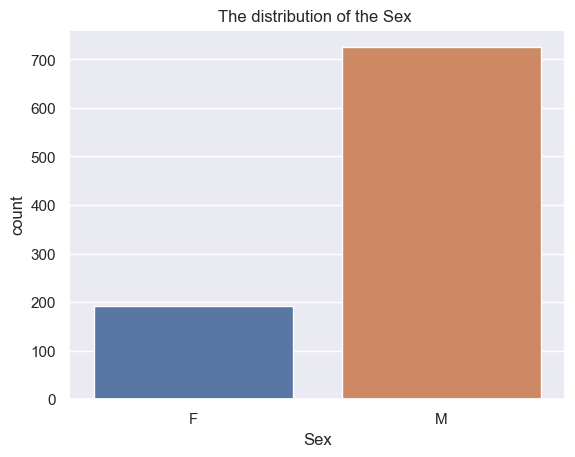

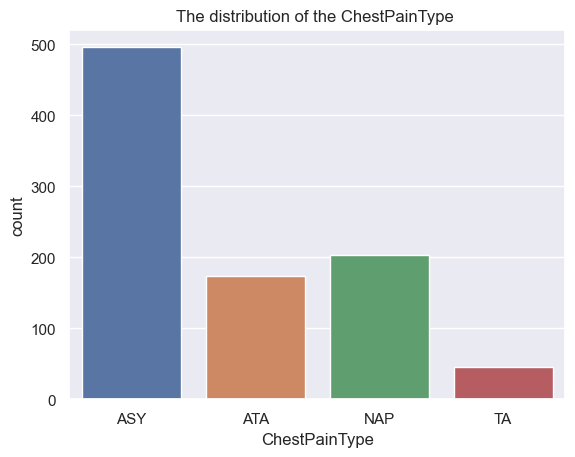

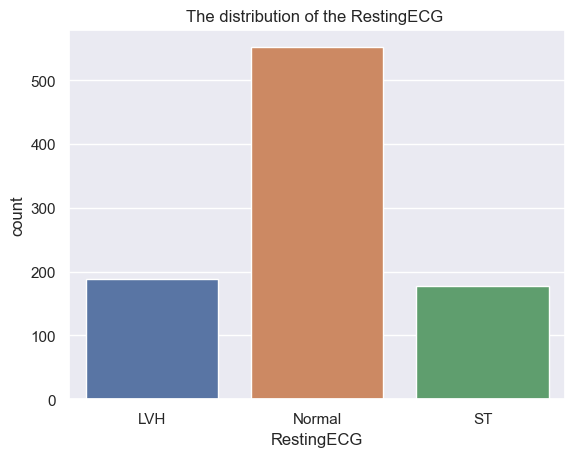

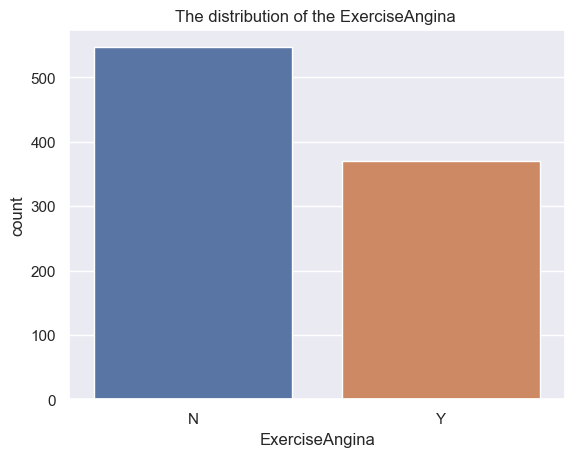

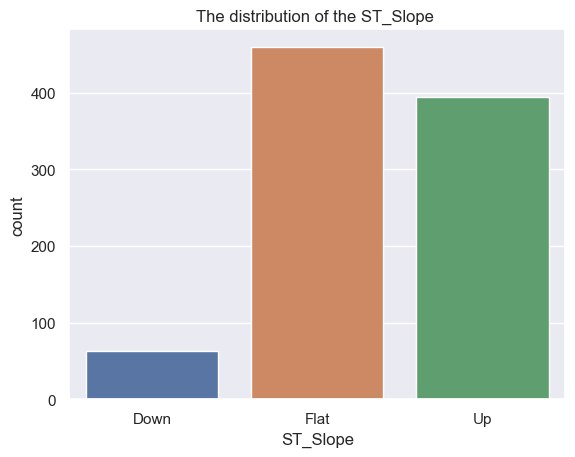

In [14]:
sns.set_theme(style = 'darkgrid')
for i in cat_cols: 
    sns.countplot(data = data, x = i)
    plt.title(f'The distribution of the {i} ')
    plt.show()

Из соответствующих графиков мы делаем выводы:

 1) Пациентов мужского пола на много больше, чем женского

 2) Основной тип боли в груди, который преобладает в нашей датасете - это бессимптомный (ASY), остальные встречаются реже

 3) Результаты кардиограммы в покое зачастую находятся в пределах нормы у большинства пациентов

 4) Стенокардии, вызванной физической нагрузкой, не подвержены более чем половина пациентов

 5) Наклон сегмента ST пикового упражнения наиболее часто является плоским или же имеет восходящий уклон.

Также для анализа  хотелось бы увидеть графики количества категориальных признаков, сгруппированных по переменной болезни сердца.

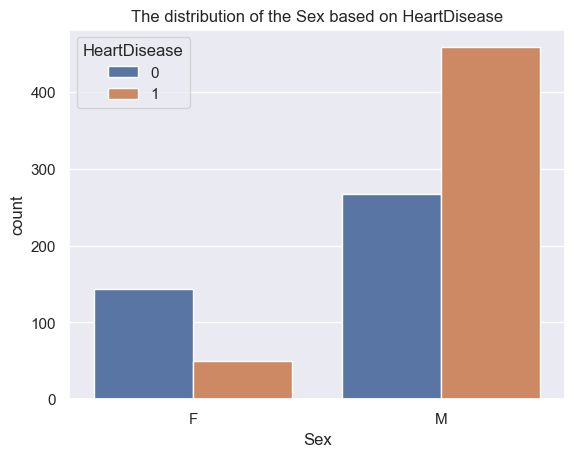

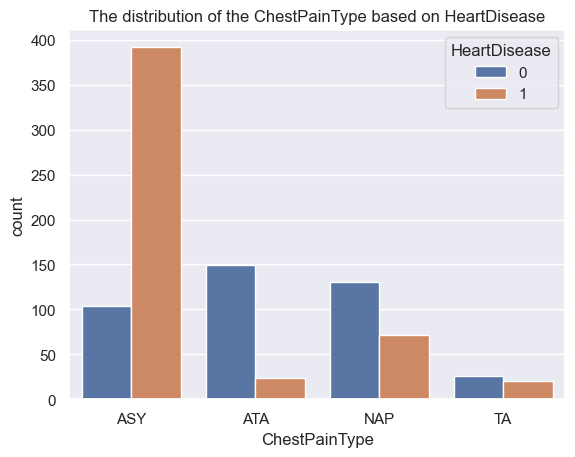

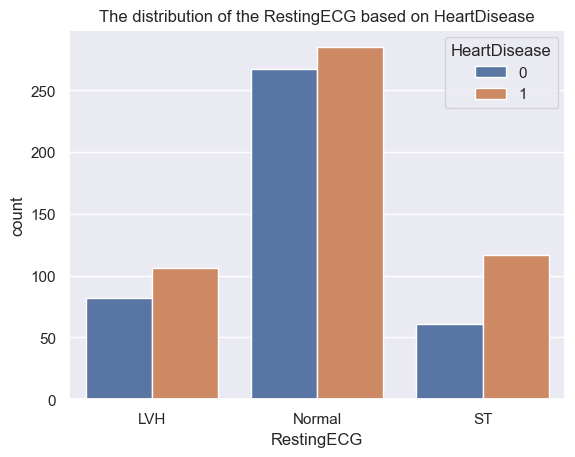

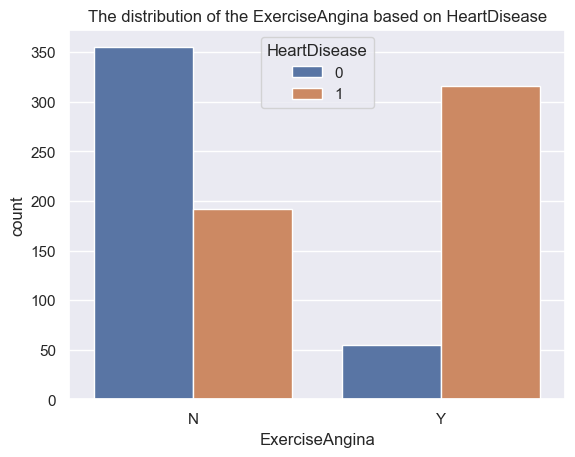

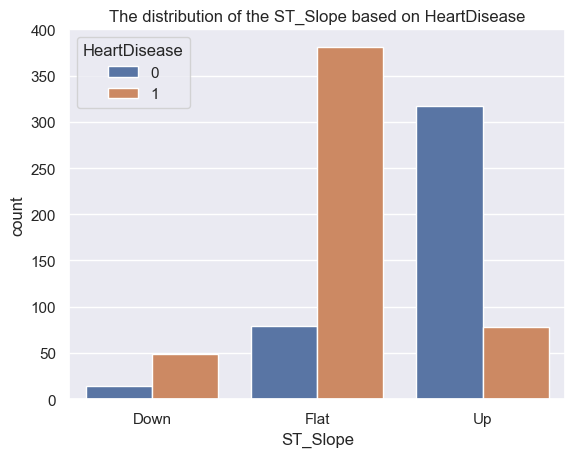

In [15]:
sns.set_theme(style = 'darkgrid')
for i in cat_cols: 
    sns.countplot(data = data, x = i, hue = 'HeartDisease')
    plt.title(f'The distribution of the {i} based on HeartDisease')
    plt.show()

Краткое резюме:
- Из первого графика мы видим, что середечная недостаточность преобладает у мужчин больше, чем у женщин.
- Пациенты, у которых не было боли в груди( проходило бессимптомно), на много чаще имели болезнь сердца,но наличие типичной стенокардии также указывало на это, хоть и в меньшей степени.
- Пациенты с нормальными результатами кардиограммы в покое 50/50 были подвержены сердечной недостаточности, а вот c аномалией зубца ST-T немного больше, чем LVH и Normal.
- У людей со стенокардией меньшинство имело норму, в отличии от пацентов без стенокардии.

Также поступим и для числовых признаков, построив несколько гистограмм:

In [16]:
num_colss = num_cols[:-1]

sns.set_theme(style = 'darkgrid')
for i in num_colss:
            sns.displot(data = data, x = i,hue = 'HeartDisease', multiple='dodge', kde = True)
            plt.title(f'The distribution of the {i} based on HeartDisease')
            plt.show()

Матрицу корреляции рассмотрим чуть позже ( после обработки категориальных признаков)

**Обработка  пропущенных значений**

Посмотрим количество пропущенных значений в нашем наборе данных.

In [17]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Пропущенные значения отсутствуют.

**Обработка категориальных признаков**

Находим категориальные признаки и используем LabelEncoder для перевода в численные значения

In [18]:

from sklearn.preprocessing import LabelEncoder

data_new = data.copy()
encoder = LabelEncoder()

for i in cat_cols:
    data_new[i] = encoder.fit_transform(data_new[i])



In [19]:
data_new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [20]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


Теперь мы можем построить матрицу корреляции

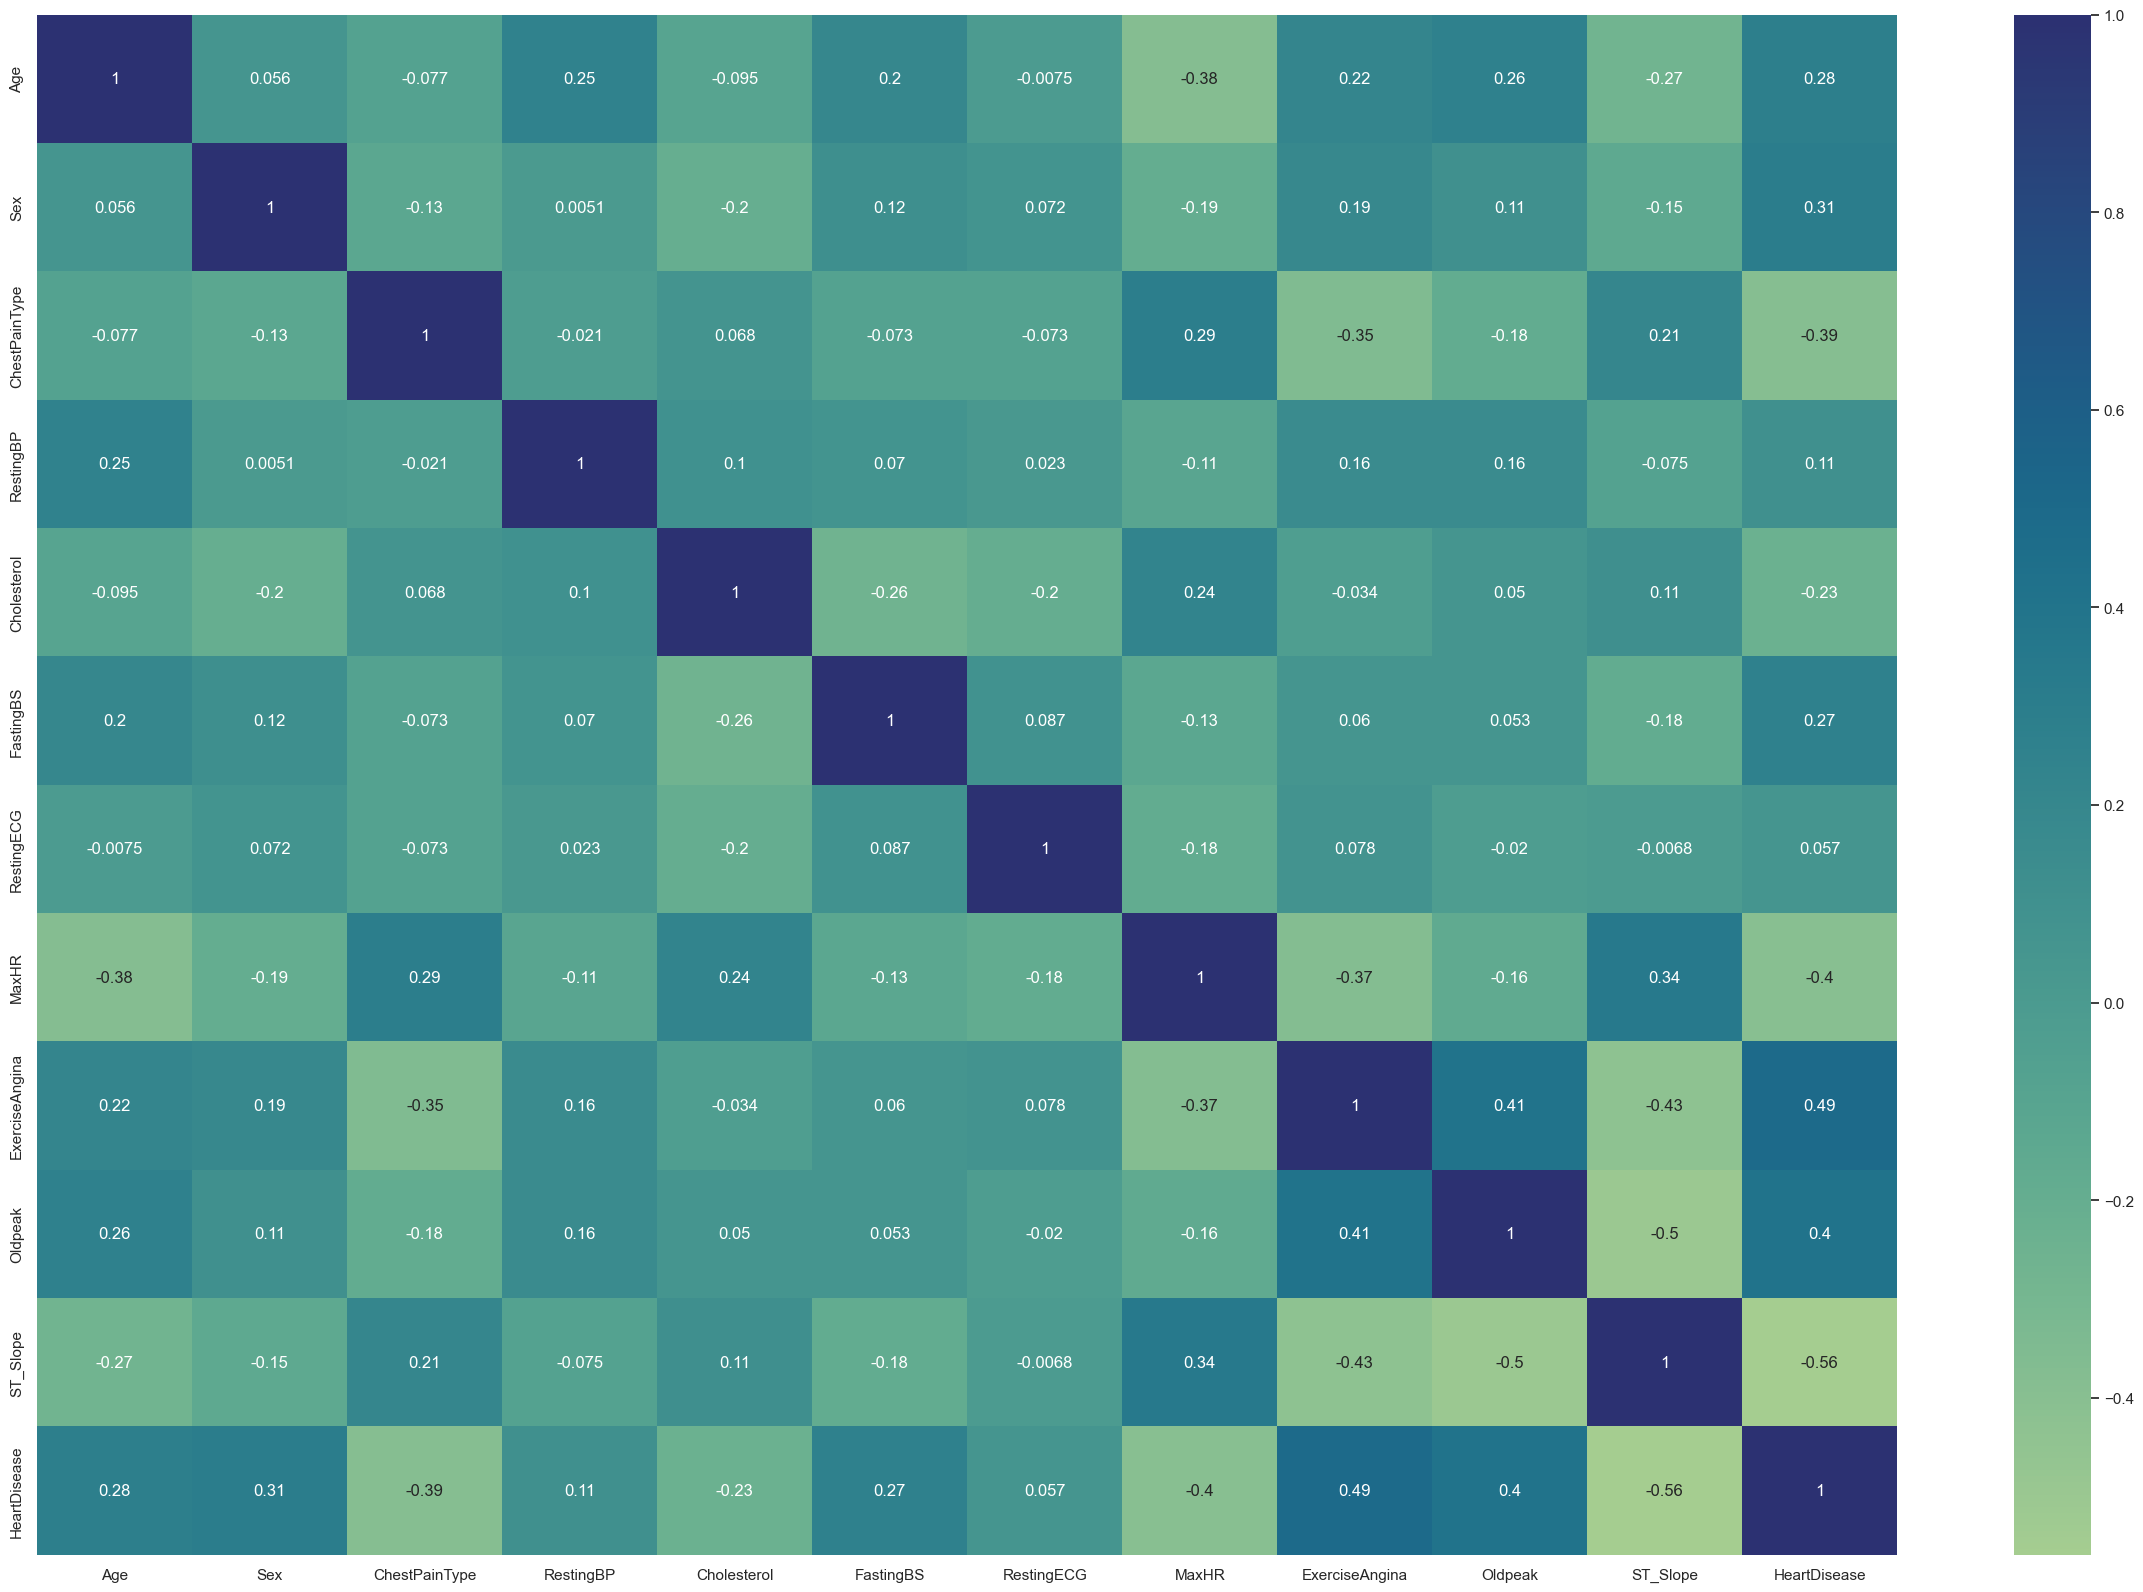

In [21]:
mask = np.zeros_like(data_new.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(data_new.corr(), annot = True, cmap = 'crest')

Некоторые виды коэффициентов корреляции могут быть положительными или отрицательными.Отрицательная корреляция — корреляция, при которой увеличение одной переменной связано с уменьшением другой. 

В данной работе наиболее сильная положительная корреляция (0.49) наблюдается между HeartDisease ( наличие сердечной недостаточности ) и ExerciseAngina ( наличие стенокардии, вызванной физической нагрузкой).
Наиболее сильная отрицательная корреляция ( -0.56) между HeartDisease ( наличие сердечной недостаточности ) и ST_Slope (наклон сегмента ST ), а также (-0.5) между  ST_Slope (наклон сегмента ST)   и  Oldpeak (пик нагрузки).

**Наличие выбросов**

Числовые признаки:


In [22]:
for i in data_new.columns:
    print(data_new[i].value_counts())



54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
1    725
0    193
Name: Sex, dtype: int64
0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
1    552
0    188
2    178
Name: Rest

**Нормализация признаков с помощью линейного преобразования:**



In [23]:
data_normal = (data_new - data_new.min(axis=0)) / (data_new.max(axis=0) - data_new.min(axis=0))
data_normal.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.260349,0.661983,0.329684,0.233115,0.494553,0.540911,0.404139,0.396291,0.680828,0.553377
std,0.192502,0.407701,0.318840,0.092571,0.181400,0.423046,0.315836,0.179298,0.490992,0.121201,0.303528,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.000000,0.600000,0.287313,0.000000,0.500000,0.422535,0.000000,0.295455,0.500000,0.000000
50%,0.530612,1.000000,0.000000,0.650000,0.369818,0.000000,0.500000,0.549296,0.000000,0.363636,0.500000,1.000000
75%,0.653061,1.000000,0.666667,0.700000,0.442786,0.000000,0.500000,0.676056,1.000000,0.465909,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Разбиение данных на обучающую и тестовую выборки**

In [24]:
from sklearn.model_selection import train_test_split

X = data_normal.drop('HeartDisease', axis = 1)
y = data_normal['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

Создадим функцию для удобного подбора параметров

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

def cv_params(model, param_grid):
    scoring = 'neg_mean_absolute_error'
    opt_params = GridSearchCV(
      estimator = model, # модель
      param_grid = param_grid, # параметры
      scoring = scoring, # стратегия валидаци
      cv = 5,#количество слоев кросс - валидации
      #verbose = 10 
      n_jobs = -1 ) #количество потоков для обучения , -1 = все
    opt_params.fit(X_train,y_train)
    params = opt_params.best_params_
    best_score = opt_params.best_score_

    print(f'Best score:{round(-best_score,2)}')
    print(f'Best parameters:{params}\n')

    return params
  

Параметры для KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score
knn_param_grid = {
    'n_neighbors': np.arange(1,30), 
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
    
}
knn_clean = KNeighborsClassifier()
knn_params = cv_params(knn_clean,knn_param_grid)

Best score:0.13
Best parameters:{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}



Параметры для RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'max_depth':[20,25,30,35,40],
    'n_estimators':[400,600,800]
}
rf_clean = RandomForestClassifier()
rf_params = cv_params(rf_clean,rf_param_grid)

Best score:0.13
Best parameters:{'max_depth': 20, 'n_estimators': 800}



Параметры для LGBMClassifier

In [28]:
import lightgbm
lgb_param_grid = {
    'max_depth':[4,10,15,20],
    'num_leaves':[25,25,45],
    'n_estimators':[41,100,250,500,600]
}
lgb_clean =lightgbm.LGBMClassifier(random_state=1)
lgb_params = cv_params(lgb_clean,lgb_param_grid)

Best score:0.13
Best parameters:{'max_depth': 15, 'n_estimators': 41, 'num_leaves': 25}



Теперь нам известны параметры, на которых модели дают наилучший результат. Обучим модели на этих параметрах, посмотрим ошибку и замерим время.

In [29]:
import time
#knn
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_knn_train)
error_test  = np.mean(y_test  != pred_knn)
end_time = time.time()
runtime = end_time - start_time

print(f'Error on train = {error_train}')
print(f'Error on test = {error_test}')
print(f'Runtime = {runtime}')


Error on train = 0.0
Error on test = 0.09239130434782608
Runtime = 0.0


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_knn_train)


1.0

In [31]:
accuracy_score(y_test, pred_knn)

0.907608695652174

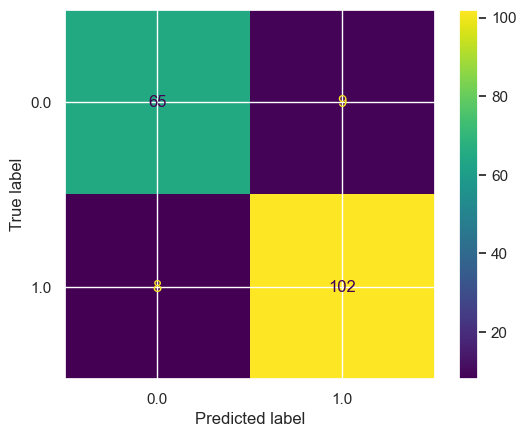

In [74]:
#ConfusionMatrix (test)
ConfusionMatrixDisplay.from_predictions(y_test,pred_knn)

Из результатов заметно, что на обучающей выборке ошибки отсутствуют, а на тестовой она составляет около 0.092

In [32]:
#rf
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train,y_train)
start_time = time.time()
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_rf_train)
error_test  = np.mean(y_test  != pred_rf)
end_time = time.time()
runtime = end_time - start_time

print(f'Error on train = {error_train}')
print(f'Error on test = {error_test}')
print(f'Runtime = {runtime}')

Error on train = 0.0
Error on test = 0.10869565217391304
Runtime = 0.0


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_rf_train)


1.0

In [34]:
accuracy_score(y_test, pred_rf)

0.8913043478260869

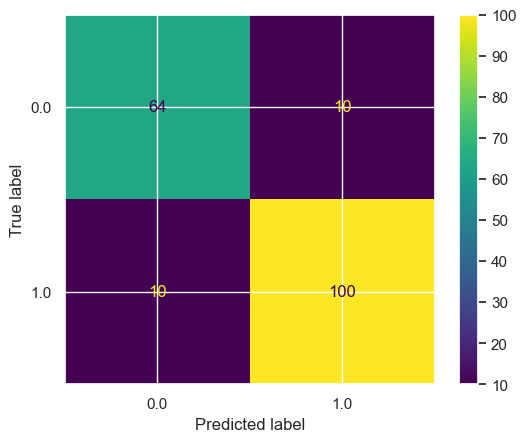

In [75]:
#ConfusionMatrix (test)
ConfusionMatrixDisplay.from_predictions(y_test, pred_rf)

Из результатов заметно, что на обучающей выборке ошибки отсутствуют, а на тестовой она составляет около 0.108

In [35]:
#lgb
lgb = lightgbm.LGBMClassifier(**lgb_params)
lgb.fit(X_train,y_train)
start_time = time.time()
pred_lgb = lgb.predict(X_test)
pred_lgb_train = lgb.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_lgb_train)
error_test  = np.mean(y_test  != pred_lgb)
end_time = time.time()
runtime = end_time - start_time

print(f'Error on train = {error_train}')
print(f'Error on test = {error_test}')
print(f'Runtime = {runtime}')

Error on train = 0.039509536784741145
Error on test = 0.09239130434782608
Runtime = 0.001001119613647461


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_lgb_train)


0.9604904632152589

In [37]:
accuracy_score(y_test, pred_lgb)

0.907608695652174

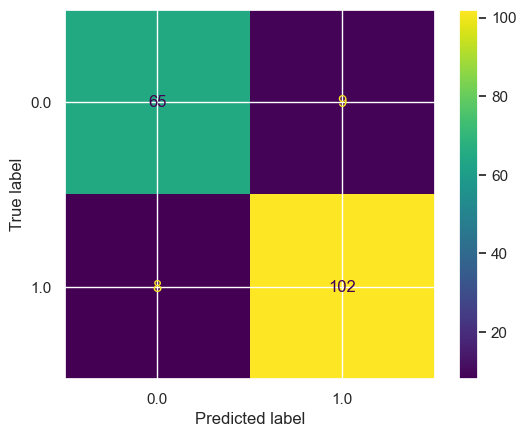

In [76]:
#ConfusionMatrix (test)
ConfusionMatrixDisplay.from_predictions(y_test, pred_lgb)

Из результатов заметно, что на обучающей выборке ошибка составляет около 0.039, а на тестовой  0.092

Дополнительно реализовав некоторые алгоритмы, мы видим, что они проигрывают по времени LGBMClassifier.

**Выводы**

В рамках данного домашнего задания была рассмотрена задача классификации наличия сердечной недостаточности на основании различных признаков. 

При обучении алгоритмом knn лучший результат достигается при следующих параметрах:

 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'.
 
На обучающей выборке ошибка равна 0, а на тестовой составляет около 0.092. Это достаточно хорошие результаты. Также стоит заметить, что есть алгоритмы, которые работают лучше чем KNN.  Быстрее всего работает LGBMClassifier.

Подводя итог, делаем вывод, что предобработка данных и их анализ были выполнены успешно, что и дало вполне приемлемы результат.


### 3 домашнее задание 
"Обучить на ваших данных логистическую регрессию, RandomFortest, полносвязную (неглубокую - скрытых 1-2 слоя) нейронную сеть. По крайней мере для одной из моделей найти оптимальные занчения гиперпарамтров и построить графики зависимости ошибки от них (например, для нейронных сетей от параметра alpha и от количества нейронов). Наблюдается ли переобучение/недообучение? Какой метод лучше? Обязательно изобразите confusion matrix! Все ли с ней хорошо? Если нет, то что можно сделать? Сделайте выводы.

- RandomFortest + 
- LogisticRegression + 
- FNN ( 1,2 layers) - 



Обучим логистическую регрессию

Параметры для LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg_param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'random_state':[0,1,2],
    'max_iter':[200,300,400,500,600,800,1000],

}
logreg_clean = LogisticRegression()
logreg_params = cv_params(logreg_clean, logreg_param_grid)


Best score:0.17
Best parameters:{'max_iter': 200, 'random_state': 0, 'solver': 'lbfgs'}



In [39]:

logr = LogisticRegression(**logreg_params)
logr.fit(X_train,y_train)
start_time = time.time()
pred_logr = logr.predict(X_test)
pred_logr_train = logr.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_logr_train)
error_test  = np.mean(y_test  != pred_logr)
end_time = time.time()
runtime = end_time - start_time

print(f'Error on train = {error_train}')
print(f'Error on test = {error_test}')
print(f'Runtime = {runtime}')

Error on train = 0.16076294277929154
Error on test = 0.09782608695652174
Runtime = 0.0010004043579101562


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_logr_train)


0.8392370572207084

In [41]:
accuracy_score(y_test, pred_logr)

0.9021739130434783

In [42]:
 from sklearn.metrics import ConfusionMatrixDisplay

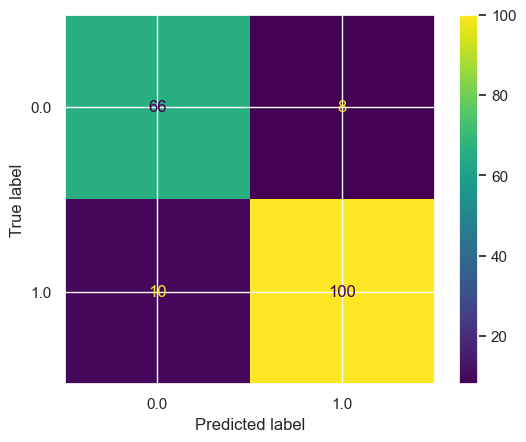

In [43]:
#ConfusionMatrix (test)
ConfusionMatrixDisplay.from_predictions(y_test, pred_logr)

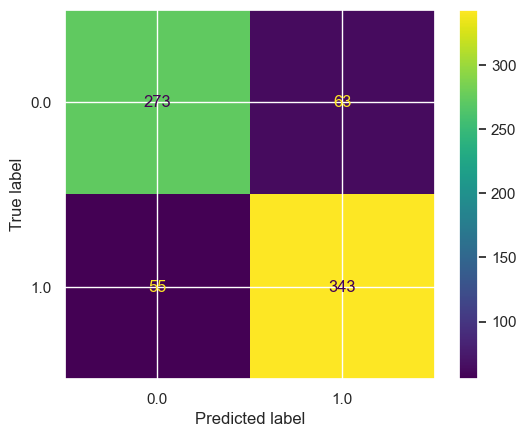

In [44]:
#ConfusionMatrix (train)
ConfusionMatrixDisplay.from_predictions(y_train, pred_logr_train)

#### Полносвязная нейронная сеть c 2-мя скрытыми слоями

Параметры для MLPClassifier

In [45]:
from sklearn.neural_network import MLPClassifier
mlp_param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'adam'],#'sgd'
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'max_iter':[200,400,600,1000],
    
}
mlp_clean = MLPClassifier(hidden_layer_sizes = (100,100), random_state=42)
mlp_params = cv_params(mlp_clean,mlp_param_grid)

Best score:0.13
Best parameters:{'activation': 'relu', 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}



C:\Users\stale\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
mlp = MLPClassifier(**mlp_params)
mlp.fit(X_train,y_train)
start_time = time.time()
pred_mlp = mlp.predict(X_test)
pred_mlp_train = mlp.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_mlp_train)
error_test  = np.mean(y_test  != pred_mlp)
end_time = time.time()
runtime = end_time - start_time

print(f'Error on train = {error_train}')
print(f'Error on test = {error_test}')
print(f'Runtime = {runtime}')

Error on train = 0.14032697547683923
Error on test = 0.08152173913043478
Runtime = 0.001035928726196289


C:\Users\stale\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_mlp_train)

0.8596730245231607

In [48]:
accuracy_score(y_test, pred_mlp)

0.9184782608695652

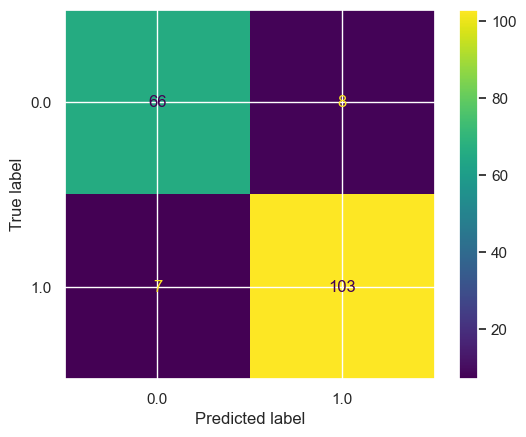

In [49]:
#ConfusionMatrix (test)
ConfusionMatrixDisplay.from_predictions(y_test, pred_mlp)


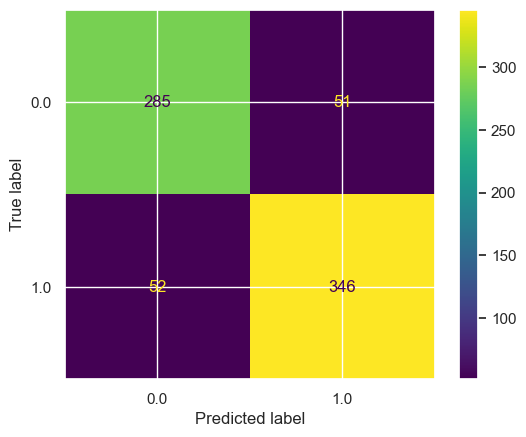

In [50]:
#ConfusionMatrix (train)
ConfusionMatrixDisplay.from_predictions(y_train, pred_mlp_train)

#### Подбор параметра alpha   

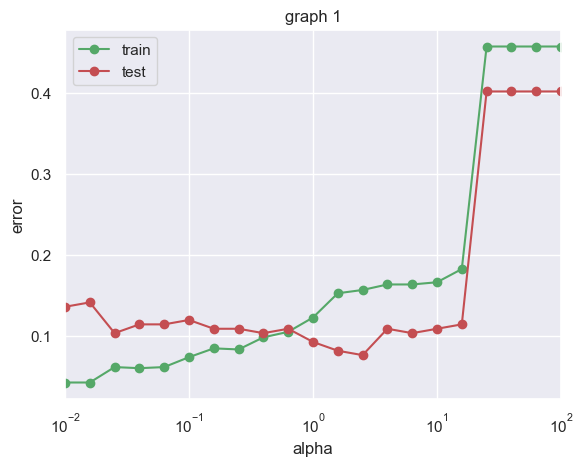

In [51]:
alpha_list = np.logspace(-2, 2, 21)

train_error = []
test_error = []

for alpha in alpha_list:
    mlp = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,100), random_state=42, 
                              solver = 'adam', activation = 'relu', max_iter=1000)
    mlp.fit(X_train, y_train)

    y_train_mlp = mlp.predict(X_train)
    y_test_mlp = mlp.predict(X_test)
    
    train_error.append(np.mean(y_train != y_train_mlp))
    test_error.append(np.mean(y_test != y_test_mlp))
    
plt.semilogx(alpha_list, train_error, 'g-o', label = 'train')
plt.semilogx(alpha_list, test_error, 'r-o', label = 'test')
plt.xlim([np.min(alpha_list), np.max(alpha_list)])
plt.title('graph 1')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Выше представлен график зависимости ошибки от параметра alpha


Минимальные значения ошибки:

In [52]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print('Min error on train = ', min_train_error)
print('Min error on test = ', min_test_error)

Min error on train =  0.04223433242506812
Min error on test =  0.07608695652173914


Оптимальное значение alpha:

In [53]:
alpha_opt = alpha_list[test_error == min_test_error]
print('Optimal alpha = ', alpha_opt)


Optimal alpha =  [2.51188643]


#### Подбор параметра  number of neurons

C:\Users\stale\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stale\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


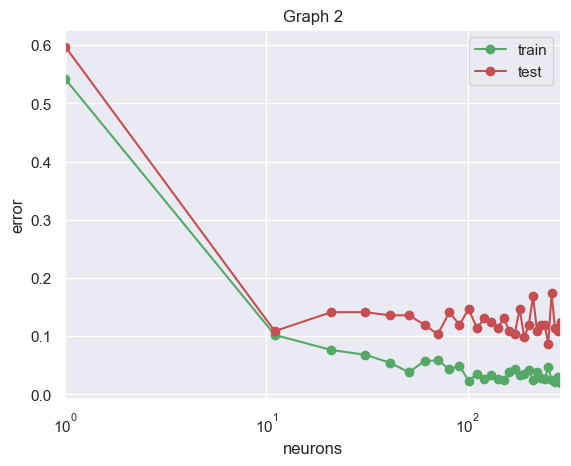

In [61]:
n_list = np.array([i for i in range(1, 300, 10)])

train_error = []
test_error = []

for neurons in n_list:
    mlp = MLPClassifier(hidden_layer_sizes = (neurons,neurons), random_state=42, 
                              solver = 'adam', activation = 'relu', max_iter=1000)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
 
    train_error.append(np.mean(y_train != y_train_pred))
    test_error.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(n_list, train_error, 'g-o', label = 'train')
plt.semilogx(n_list, test_error, 'r-o', label = 'test')
plt.xlim([np.min(n_list), np.max(n_list)])
plt.title('Graph 2')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()    
 

Выше представлен график зависимости ошибки от кол-ва нейронов в слоях

Минимальные значения ошибки:

In [65]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print('Min error on train = ', min_train_error)
print('Min error on test = ', min_test_error)

Min error on train =  0.020435967302452316
Min error on test =  0.08695652173913043


Оптимальное значение number of neurons :

In [63]:
neurons_opt = n_list[test_error == min_test_error]
print('Optimal number of neurons for test = ', neurons_opt)

Optimal number of neurons =  [251]


In [77]:
mlp = MLPClassifier(alpha = 2.51, hidden_layer_sizes = (251,251), random_state=42, 
                              learning_rate = 'constant',solver = 'adam', activation = 'relu', max_iter=1000)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
start_time = time.time()
error_train = np.mean(y_train != y_train_pred)
error_test  = np.mean(y_test  != y_test_pred)
end_time = time.time()
runtime = end_time - start_time

print(f'Error on train = {error_train}')
print(f'Error on test = {error_test}')
print(f'Runtime = {runtime}')

Error on train = 0.15940054495912806
Error on test = 0.07608695652173914
Runtime = 0.0010004043579101562


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.840599455040872

In [80]:
accuracy_score(y_test, y_test_pred)

0.9239130434782609

**Выводы**


В рамках данного домашнего задания была рассмотрена задача прогнозирования сердечной недостаточности. Были обучены такие модели как: LogisticRegression, Random Forest(модель была обучена в 1 дз) и MLPClassifier(2 layers). Для нейронной сети были подобраны оптимальные значения гиперпараметров (alpha и количество нейронов). Также с помощью GridSearchCV был осуществлен перебор других параметров. При оптимальных значениях гиперпараметров удалось достичь  точности 92,3% на тестовой выборке. Также к каждой модели была построена 
ConfusionMatrix. Если сравнивать логистическую регрессию и нейронную сеть, то она показала себя немного хуже (90,2%), но при этом была лучше Random Forest (89,1%).